# Error Correction in Quantum Computing

Error correction is a crucial aspect of quantum computing, as it addresses the challenges posed by the fragile nature of quantum states. Quantum bits, or qubits, are highly susceptible to errors due to decoherence and other forms of noise, making reliable computation difficult without correction methods.

### Types of Errors

1. **Bit Flip Error**: Occurs when a qubit changes its state from $|0\rangle$ to $|1\rangle$ or vice versa.
2. **Phase Flip Error**: Alters the relative phase of a qubit, changing a state like $|+\rangle$ to $|-\rangle$.
3. **Amplitude Damping**: Describes energy loss, often driving a qubit to the $|0\rangle$ state.

### Quantum Error Correction (QEC)

Quantum error correction involves encoding quantum information in a way that allows for the detection and correction of errors without measuring the qubits directly, thus preserving quantum coherence.

#### Basic Principles

1. **Redundancy**: Information is distributed across multiple qubits to allow for error detection and correction. For example, in the 3-qubit bit flip code, a single qubit's state is encoded into three qubits.

2. **Syndrome Measurement**: Detects errors without collapsing the quantum state by measuring auxiliary qubits (ancillas), which indicate the type of error without revealing the encoded information.

3. **Error Correction**: Based on the syndrome measurement, operations are applied to correct errors and restore the intended quantum state.

### Examples of Error Correction Codes

1. **Shor Code**: Combines bit flip and phase flip correction to protect against arbitrary single-qubit errors using 9 qubits.
2. **Steane Code**: A 7-qubit code that encodes a single logical qubit and corrects arbitrary single-qubit errors.
3. **Surface Codes**: Utilize a 2D lattice of qubits and are promising for scalability in practical quantum systems.

## Importance of Error Correction

Quantum error correction is essential for the realization of reliable quantum computing. It enables long-duration computations, protects quantum information, and helps achieve fault-tolerant quantum computers, paving the way for practical applications in cryptography, optimization, and more.

By continuously advancing error correction techniques, researchers aim to overcome the limitations imposed by quantum noise and move closer to achieving the full potential of quantum computing.


In [27]:
import random
import matplotlib.pyplot as plt
import numpy as np
import cirq
from cirq.contrib.svg import SVGCircuit

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range (2**num_qubits)]

plt.rcParams.update({'font.size': 8})

## Part 1: Bit Flip Error

### Implementing a 3-Qubit Bit Flip Error Correcting Code Using a 5-Step Process

- Bit flip error correction is a quantum error correction technique designed to protect quantum information from bit flip errors. 
- A bit flip error occurs when a qubit's state is erroneously changed from $|0\rangle$ to $|1\rangle$ or from $|1\rangle$ to $|0\rangle$. The 3-qubit bit flip code is a simple yet effective way to detect and correct single bit flip errors.

### Process

#### 1. Encoding

- The original qubit state $|\psi\rangle$ is encoded into a three-qubit state. 
- For example, if the initial state is $|0\rangle$, it is encoded as $|000\rangle$;  if it is $|1\rangle$, it is encoded as $|111\rangle$. This redundancy allows the system to detect errors.

#### 2. Sending Over Noisy Channel

- The encoded qubits are transmitted over a noisy quantum channel. During transmission, one of the qubits may undergo a bit flip error due to noise.

#### 3. Error Detection

- After transmission, the qubits are checked to identify any bit flip errors. This is done by measuring the parity between pairs of qubits. The results indicate whether an error has occurred and which qubit is likely affected.

#### 4. Error Correction

- If a bit flip error is detected, the erroneous qubit is flipped back to its correct state. This step restores the encoded state to its intended form before the error occurred.

#### 5. Decoding

- The corrected three-qubit state is decoded back to the original single-qubit state $|\psi\rangle$. This final step retrieves the intended quantum information, now free of bit flip errors.

### **Step 1: Encoding**

#### 1.1: Initialize a circuit with 3-Qubits and 1 Classical Bit

In [28]:
qubits = cirq.NamedQubit.range(3, prefix='q')
encode_circuit = cirq.Circuit()

#### 1.2: Entangle the state of $q_0$ with other two qubits

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


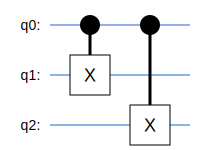

In [29]:
encode_circuit.append(cirq.CNOT(qubits[0], qubits[1]))
encode_circuit.append(cirq.CNOT(qubits[0], qubits[2]))

display(SVGCircuit(encode_circuit))

### **Step 2: Sending Over Noisy Channel**

- Creating a new circuit to represent the noisy channel and specifically simulate a bit flip error on $q_0$. 
- **Note :** X-Gate flips a qubit from $|0\rangle$ to $|1\rangle$ or  $|1\rangle$ to $|0\rangle$.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


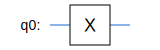

In [30]:
noisy_channel_circuit = cirq.Circuit()

noisy_channel_circuit.append(cirq.X(qubits[0]))

display(SVGCircuit(noisy_channel_circuit))

#### **Step 3: Error Detection**

- Creating a new circuit to detect if there is been an error by checking the parity ( do they agree with each other or different?) of $q_0$ with the other qubits using $CNOT$ gate

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


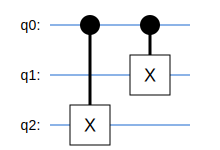

In [31]:
detection_circuit = cirq.Circuit()

detection_circuit.append(cirq.CNOT(qubits[0], qubits[2]))
detection_circuit.append(cirq.CNOT(qubits[0], qubits[1]))

display(SVGCircuit(detection_circuit))

#### **Step 4: Error Correction**

- We will now creat a circuit to update $q_0$ if both $q_1$ and $q_2$ have detected a bit flip so that $q_0$ stores the correct logical state.
- Specifically applying the `TOFFOLI(CCNOT)` gate controlled by $q_2$ and $q_1$, targeting $q_0$.

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


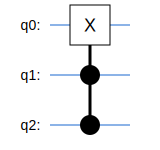

In [32]:
correction_circuit = cirq.Circuit()

correction_circuit.append(cirq.CCNOT(qubits[2], qubits[1], qubits[0]))

display(SVGCircuit(correction_circuit))

#### **Step 5: Decoding**

- The logical gate has been stored in $q_0$.
- Now creating a decoding circuit to measure this qubit in order to decode the final logical state.

findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


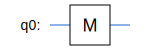

In [33]:
decode_circuit = cirq.Circuit()

decode_circuit.append(cirq.measure(qubits[0]))

display(SVGCircuit(decode_circuit))

### **Adding the Circuits and Simulating**

- Now that we have created all the part of our `bitflip_circuit`, we will combine all the circuit together and simulate 100 times to ensure our error correction code really works. 

findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


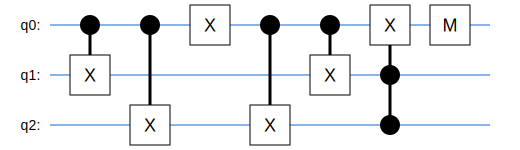

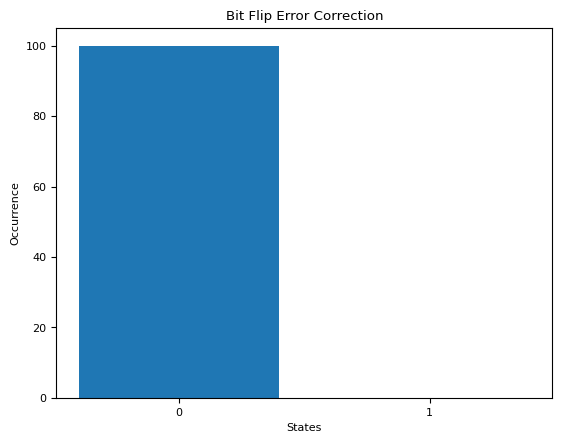

In [34]:
bitflip_circuit = encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit + decode_circuit

display(SVGCircuit(bitflip_circuit))

sim = cirq.Simulator()

result = sim.run(bitflip_circuit, repetitions=100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title='Bit Flip Error Correction', xlabel='States', ylabel='Occurrence', tick_label=binary_labels(1))

plt.show()

## Discussing How the Error is Corrected

This implementation demonstrates how a bit flip error is corrected using a 3-qubit bit flip code. The process involves encoding the original state, introducing an error through a noisy channel, detecting the error, correcting it, and then decoding the state. Here’s how each step works in the circuit:

### Steps

1. **Encoding**

   - The circuit begins by encoding the initial qubit state into three qubits using two CNOT gates. The qubit state is copied onto two additional qubits:
     $$ 
     \text{CNOT}(q_0, q_1) \quad \text{and} \quad \text{CNOT}(q_0, q_2) 
     $$
   - This creates an entangled state where any bit flip can be detected.

2. **Noisy Channel**

   - A bit flip error is introduced on the first qubit using an $X$ gate:
       $$X(q_0)$$
   - This simulates a bit flip error, changing the state of $q_0$ from $|0\rangle$ to $|1\rangle$ or vice versa.

3. **Error Detection**

   - The circuit detects the error by using additional CNOT gates to check the parity:
     $$ 
     \text{CNOT}(q_0, q_2) \quad \text{and} \quad \text{CNOT}(q_0, q_1) 
     $$
   - These gates compare the states of the qubits and identify any discrepancies that indicate a bit flip error.

4. **Error Correction**

   - A Toffoli (CCNOT) gate corrects the detected error:
     $$
     \text{CCNOT}(q_2, q_1, q_0)
     $$
   - This gate flips the first qubit back to its correct state if an error is detected on the other two qubits.

5. **Decoding**

   - The final step measures the state of the first qubit to retrieve the corrected state:
     $$
     \text{measure}(q_0)
     $$
   - This extracts the original quantum information, now corrected for any bit flip errors.

### Simulation and Result

- The circuit is simulated using Cirq's `Simulator` with 100 repetitions. The results are plotted in a histogram, showing the corrected states.
- The histogram displays the frequency of the output states (all in $|0\rangle$ state), indicating successful error correction by showing a high occurrence of the $|0\rangle$ state.

This process showcases the basic principles of quantum error correction, illustrating how redundancy and error detection/correction mechanisms work together to preserve quantum information.


### Question 1: Modify the code to prepare the logical qubit in $|1\rangle$ state 

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


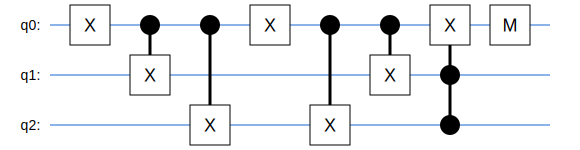

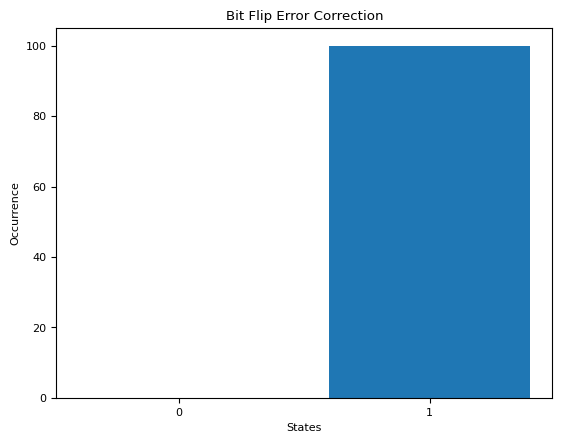

In [35]:
# Preparing given state
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.X(qubits[0]))

# Appending Rest of the circuit
bitflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit + decode_circuit

display(SVGCircuit(bitflip_circuit))

# Simulating
sim = cirq.Simulator()

result = sim.run(bitflip_circuit, repetitions=100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title='Bit Flip Error Correction', xlabel='States', ylabel='Occurrence', tick_label=binary_labels(1))

plt.show()

### Question 2: Modify the code to prepare the logical qubit in $|+\rangle$ state 

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


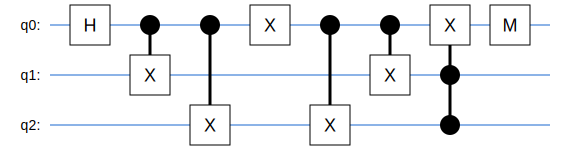


Final State (Without Measurement):
0.71|011⟩ + 0.71|111⟩


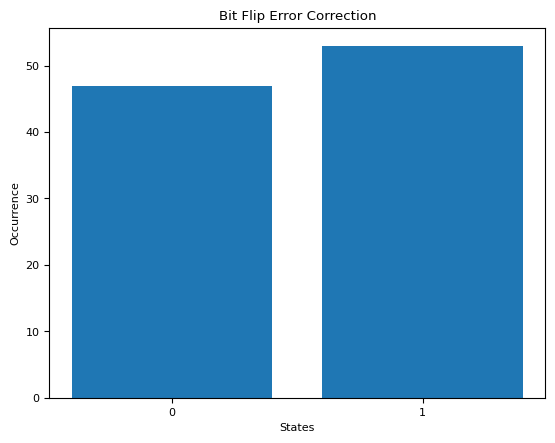

In [36]:
# Preparing given state
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.H(qubits[0]))

# Appending Rest of the circuit
bitflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit + decode_circuit

display(SVGCircuit(bitflip_circuit))

# Print Final State Vector without measuring (decode_circuit)
print("\nFinal State (Without Measurement):")
print(cirq.dirac_notation(cirq.final_state_vector(prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit)))

# Simulating
sim = cirq.Simulator()

result = sim.run(bitflip_circuit, repetitions=100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title='Bit Flip Error Correction', xlabel='States', ylabel='Occurrence', tick_label=binary_labels(1))

plt.show()

### Question 3: Modify the code to prepare the logical qubit in $|-\rangle$ state 

findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


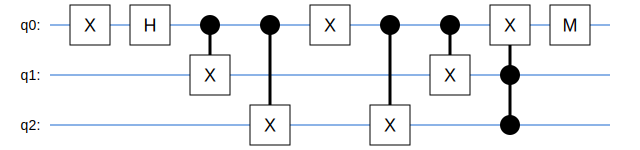


Final State (Without Measurement):
0.71|011⟩ - 0.71|111⟩


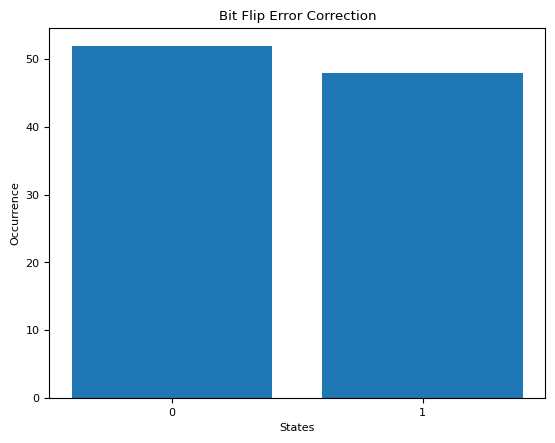

In [37]:
# Preparing given state
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.X(qubits[0]))
prepare_circuit.append(cirq.H(qubits[0]))

# Appending Rest of the circuit
bitflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit + decode_circuit

display(SVGCircuit(bitflip_circuit))

# Print Final State Vector without measuring (decode_circuit)
print("\nFinal State (Without Measurement):")
print(cirq.dirac_notation(cirq.final_state_vector(prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit))) 

# Simulating
sim = cirq.Simulator()

result = sim.run(bitflip_circuit, repetitions=100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title='Bit Flip Error Correction', xlabel='States', ylabel='Occurrence', tick_label=binary_labels(1))

plt.show()

## Discussing Final State Vector: Understanding $|+\rangle$ and $|-\rangle$

### Final State Without Measurement

The circuit can produce states like:
#### **$|+\rangle$ State :** 
$$
0.71|011\rangle + 0.71|111\rangle
$$
This indicates that $q_0$ is in the $|+\rangle$ state. In this 3-qubit encoding, the $|+\rangle$ state is initially prepared on $q_0$ as:
$$
|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$
For the encoded state, $|0\rangle$ corresponds to $|011\rangle$ and $|1\rangle$ to $|111\rangle$, maintaining the superposition.

#### **$|-\rangle$ State :**

$$
0.71|011\rangle - 0.71|111\rangle
$$
This indicates that $q_0$ is in the $|-\rangle$ state. The $|-\rangle$ state is initially prepared on $q_0$ as:
$$
|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$
For the encoded state, the phase difference between $|011\rangle$ and $|111\rangle$ shows the negative sign, distinguishing it from the $|+\rangle$ state.

### Why Calculate Without Measurement?

1. **Preserve Superposition**: Measurement collapses quantum states. By avoiding it, we retain the full superposition needed for verifying circuit operations.
2. **Quantum Information**: Analyzing the unmeasured state allows for a clearer understanding of how quantum information is manipulated and corrected.

### Question 4: Modify the code so that the qubit is in the $|0\rangle$ state but there is a bit flip error on both $q_1$ and $q_2$

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


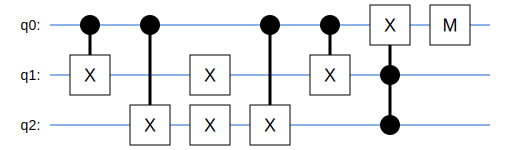


Final State (Without Measurement):
|111⟩


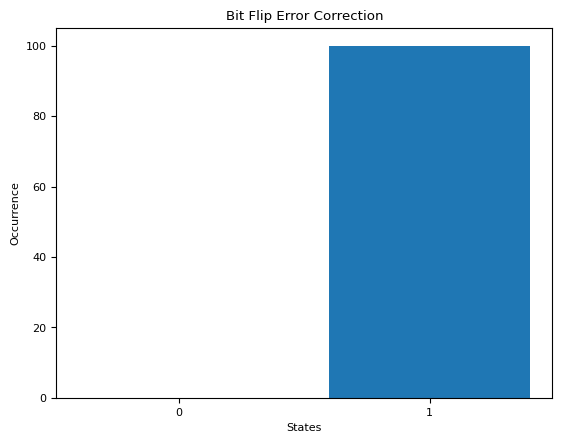

In [38]:
# Preparing Noises
noisy_channel_circuit = cirq.Circuit()
noisy_channel_circuit.append(cirq.X(qubits[1]))
noisy_channel_circuit.append(cirq.X(qubits[2]))

# Appending Rest of the circuit
bitflip_circuit = encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit + decode_circuit

display(SVGCircuit(bitflip_circuit))

# Print Final State Vector without measuring (decode_circuit)
print("\nFinal State (Without Measurement):")
print(cirq.dirac_notation(cirq.final_state_vector(encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit))) 

# Simulating
sim = cirq.Simulator()

result = sim.run(bitflip_circuit, repetitions=100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title='Bit Flip Error Correction', xlabel='States', ylabel='Occurrence', tick_label=binary_labels(1))

plt.show()

**Note :** Since two of the qubits are flipped. The result is always wrong.

## Conclusion

- In quantum error correction, the accuracy of error correction schemes can be significantly impacted by the number of qubits affected by errors. In our case, when the majority of qubits (2 out of 3) experience phase flip errors, the correction process may fail to restore the logical qubit to its correct state. This is because the error correction code relies on the majority to determine the presence of an error and apply the necessary corrections.

- When most of the qubits are erroneous, the correction mechanism can be overwhelmed, leading to incorrect results. This highlights the importance of having reliable error correction codes and the need for robust schemes capable of handling multiple errors to ensure the fidelity of quantum computations.

- Thus, while error correction codes can effectively handle single errors or a small number of errors, they may struggle when the majority of qubits are affected, underscoring the need for continued advancements in quantum error correction methods.

## Part 2: Phase Flip Error Correction

In this section, we implement a quantum error correction code to handle phase flip errors. Phase flip errors invert the phase of a qubit, changing the sign of the phase component in the state vector. This process involves five main steps: encoding, sending over a noisy channel, error detection, error correction, and decoding.

### Steps:

1. **Encoding**: 
   - The logical qubit is encoded into three physical qubits using CNOT gates and Hadamard gates. This prepares the qubits in a superposition state that allows for phase flip error detection and correction.

2. **Sending Over Noisy Channel**:
   - A phase flip error is simulated by applying a Z gate on the first qubit, which inverts the phase of that qubit.

3. **Error Detection**:
   - Hadamard gates are applied to transform phase errors into bit flip errors, which are easier to detect. CNOT gates are then used to detect discrepancies among the qubits.

4. **Error Correction**:
   - A CCNOT (Toffoli) gate is used to correct detected errors, ensuring that the logical qubit is restored to its original state.

5. **Decoding**:
   - The first qubit is measured to decode the corrected logical qubit, retrieving the original quantum information.

This sequence allows for the detection and correction of phase flip errors by leveraging the transformation of phase errors into bit flip errors, which can be more readily detected and corrected using established quantum error correction techniques.



### **Step 1: Encoding**

#### 1.1: Initialize a circuit with 3-Qubits and 1 Classical Bit

In [39]:
qubits = cirq.NamedQubit.range(3, prefix='q')
encode_circuit = cirq.Circuit()

#### 1.2: Entangle the state of $q_0$ with other two qubits

findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


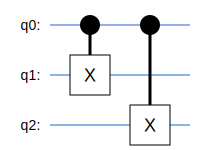

In [40]:
encode_circuit.append(cirq.CNOT(qubits[0], qubits[1]))
encode_circuit.append(cirq.CNOT(qubits[0], qubits[2]))

display(SVGCircuit(encode_circuit))

#### 1.3: Put all qubits in equal superpositions to correct  $|+\rangle$ and $|-\rangle$ states from flipping instead of $|0\rangle$ and $|1\rangle$

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


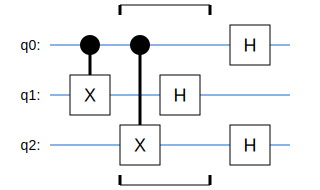

In [41]:
encode_circuit.append(cirq.H.on_each(qubits))

display(SVGCircuit(encode_circuit))

### **Step 2: Sending Over Noisy Channel**

- Creating a new circuit to represent the noisy channel and specifically simulate a phase flip error on $q_0$. 
- **Note :** Z-Gate flips a qubit from $|+\rangle$ to $|-\rangle$ or  $|-\rangle$ to $|+\rangle$.

In [42]:
noisy_channel_circuit = cirq.Circuit()

noisy_channel_circuit.append(cirq.Z(qubits[0]))

noisy_channel_circuit

q0: ───Z───

#### **Step 3: Error Detection**

- Creating a new circuit to detect if there is been an error by checking the phase ( do the phase agree with each other or different?) of $q_0$ with the other qubits by bringing all the qubits out of superposition (H-Gate)
- Then checking the parity of the $q_0$ with the ancilla qubits by applying to CNOTs controlled by $q_0$ and targeting the ancilla qubits.


**Note :** Only the part dealing with superposition is different from the bit flip code

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


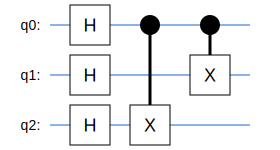

In [43]:
detection_circuit = cirq.Circuit()

detection_circuit.append(cirq.H.on_each(qubits))

detection_circuit.append(cirq.CNOT(qubits[0], qubits[2]))
detection_circuit.append(cirq.CNOT(qubits[0], qubits[1]))

display(SVGCircuit(detection_circuit))

#### **Step 4: Error Correction**

- We will now creat a circuit to update $q_0$ if both $q_1$ and $q_2$ have detected a bit flip so that $q_0$ stores the correct logical state.
- Specifically applying the `TOFFOLI(CCNOT)` gate controlled by $q_2$ and $q_1$, targeting $q_0$. 

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


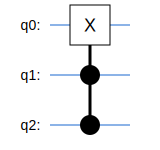

In [44]:
correction_circuit = cirq.Circuit()

correction_circuit.append(cirq.CCNOT(qubits[2], qubits[1], qubits[0]))

display(SVGCircuit(correction_circuit))

#### **Step 5: Decoding**

- The logical gate has been stored in $q_0$.
- Now creating a decoding circuit to measure this qubit in order to decode the final logical state.

In [45]:
decode_circuit = cirq.Circuit()

decode_circuit.append(cirq.measure(qubits[0]))

decode_circuit

q0: ───M───

### **Adding the Circuits and Simulating**

- Now that we have created all the part of our `phaselip_circuit`, we will combine all the circuit together and simulate 100 times to ensure our error correction code really works. 

findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


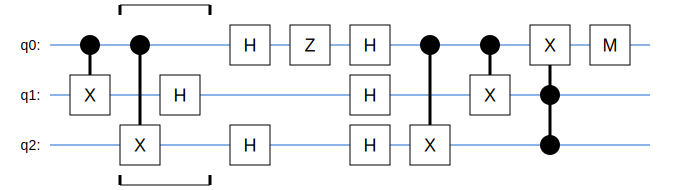

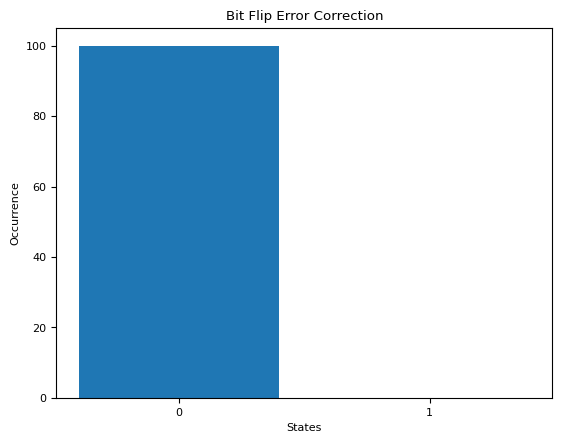

In [46]:
phaseflip_circuit = encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit + decode_circuit

display(SVGCircuit(phaseflip_circuit))

sim = cirq.Simulator()

result = sim.run(phaseflip_circuit, repetitions=100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title='Bit Flip Error Correction', xlabel='States', ylabel='Occurrence', tick_label=binary_labels(1))

plt.show()

## Discussion on Error Correction

In the phase flip error correction implementation, the objective is to detect and correct phase flip errors that may occur during quantum information processing. Here’s a detailed breakdown of how the error correction is executed and validated using the provided code:

### Error Correction Process

1. **Encoding**:
   - The logical qubit is encoded into three physical qubits using CNOT gates. This encoding spreads the information of the logical qubit across three qubits, providing redundancy that helps in error detection and correction.

2. **Phase Flip Error Introduction**:
   - A phase flip error is simulated by applying a Z gate to the first qubit. This introduces a phase inversion in the qubit's state, mimicking real-world noise effects.

3. **Transforming Phase Errors**:
   - To facilitate error detection, Hadamard gates are applied to all qubits. This transformation converts the phase flip error into a bit flip error, which is easier to detect and correct using standard techniques.

4. **Error Detection**:
   - CNOT gates are used to detect errors by comparing the states of the qubits. Discrepancies detected through these comparisons signal the presence of an error.

5. **Error Correction**:
   - The CCNOT (Toffoli) gate is utilized to correct the detected bit flip error. This gate flips the target qubit based on the states of two control qubits, ensuring that the detected error is corrected.

6. **Decoding**:
   - After error correction, the first qubit is measured to retrieve the logical qubit's state( $|0\rangle$ ). This step confirms that the error correction mechanism has successfully restored the qubit to its intended state.

### Simulation and Results

The provided code simulates the entire phase flip error correction process using the following steps:

- **Circuit Construction**: The `phaseflip_circuit` combines encoding, noisy channel simulation, error detection, correction, and decoding circuits.
- **Simulation**: The `cirq.Simulator()` is used to run the `phaseflip_circuit` 100 times.
- **Result Analysis**: The `cirq.plot_state_histogram()` function generates a histogram of the measurement outcomes, displaying the distribution of states after the correction process.

### Discussion of Results

- The histogram results show whether the correction process effectively restores the logical qubit's state ( $|0\rangle$ ). Ideally, the histogram should reflect the corrected state, confirming that the phase flip error was successfully mitigated.



### Question 1: Modify the code so that the qubit is in the $|+\rangle$ state instead of $|0\rangle$ state

findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


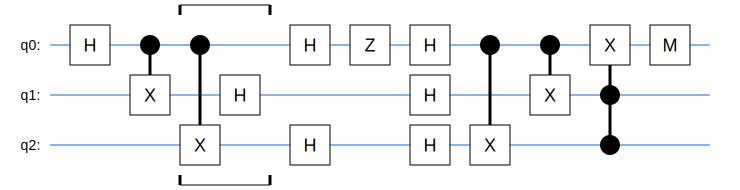


Final State (Without Measurement):
0.71|011⟩ + 0.71|111⟩


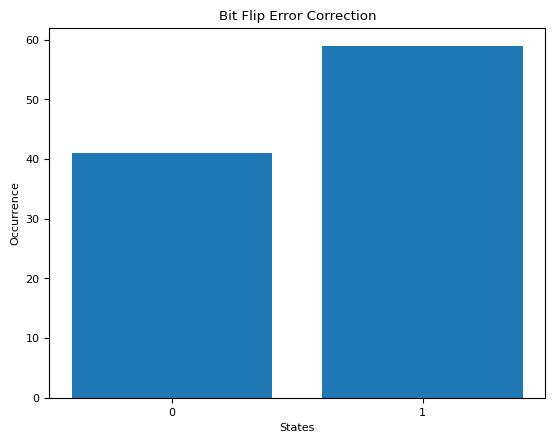

In [47]:
# Preparing given state
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.H(qubits[0]))

# Appending Rest of the circuit
phaseflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit + decode_circuit

display(SVGCircuit(phaseflip_circuit))

# Print Final State Vector without measuring (decode_circuit)
print("\nFinal State (Without Measurement):")
print(cirq.dirac_notation(cirq.final_state_vector(prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit))) 

# Simulating
sim = cirq.Simulator()

result = sim.run(phaseflip_circuit, repetitions=100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title='Bit Flip Error Correction', xlabel='States', ylabel='Occurrence', tick_label=binary_labels(1))

plt.show()

### Question 2: Modify the code so that the qubit is in the $|-\rangle$ state instead of $|0\rangle$ state

findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


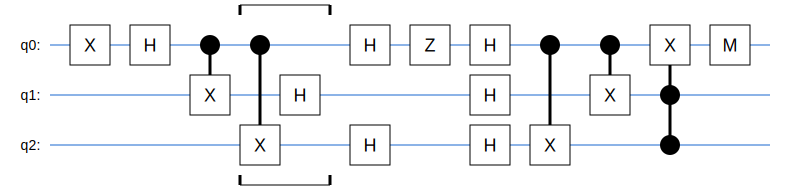


Final State (Without Measurement):
0.71|011⟩ - 0.71|111⟩


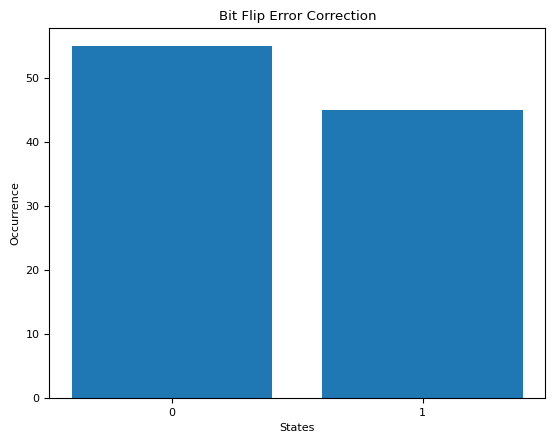

In [48]:
# Preparing given state
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.X(qubits[0]))
prepare_circuit.append(cirq.H(qubits[0]))

# Appending Rest of the circuit
phaseflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit + decode_circuit

display(SVGCircuit(phaseflip_circuit))

# Print Final State Vector without measuring (decode_circuit)
print("\nFinal State (Without Measurement):")
print(cirq.dirac_notation(cirq.final_state_vector(prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit))) 

# Simulating
sim = cirq.Simulator()

result = sim.run(phaseflip_circuit, repetitions=100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title='Bit Flip Error Correction', xlabel='States', ylabel='Occurrence', tick_label=binary_labels(1))

plt.show()

## Discussing Final State Vector: Understanding $|+\rangle$ and $|-\rangle$

### Final State Without Measurement

The circuit can produce states like:
#### **$|+\rangle$ State :** 
$$
0.71|011\rangle + 0.71|111\rangle
$$
This indicates that $q_0$ is in the $|+\rangle$ state. In this 3-qubit encoding, the $|+\rangle$ state is initially prepared on $q_0$ as:
$$
|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$
For the encoded state, $|0\rangle$ corresponds to $|011\rangle$ and $|1\rangle$ to $|111\rangle$, maintaining the superposition.

#### **$|-\rangle$ State :**

$$
0.71|011\rangle - 0.71|111\rangle
$$
This indicates that $q_0$ is in the $|-\rangle$ state. The $|-\rangle$ state is initially prepared on $q_0$ as:
$$
|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$
For the encoded state, the phase difference between $|011\rangle$ and $|111\rangle$ shows the negative sign, distinguishing it from the $|+\rangle$ state.

### Why Calculate Without Measurement?

1. **Preserve Superposition**: Measurement collapses quantum states. By avoiding it, we retain the full superposition needed for verifying circuit operations.
2. **Quantum Information**: Analyzing the unmeasured state allows for a clearer understanding of how quantum information is manipulated and corrected.

### Question 3: Modify the code so that the qubit is in the $|0\rangle$ state but there is a phase flip error on both $q_1$ and $q_2$

findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


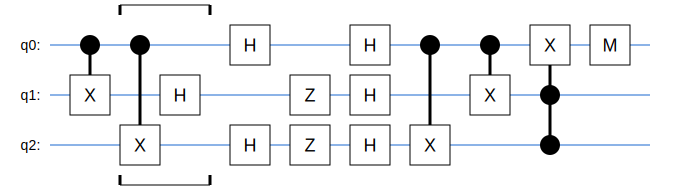


Final State (Without Measurement):
|111⟩


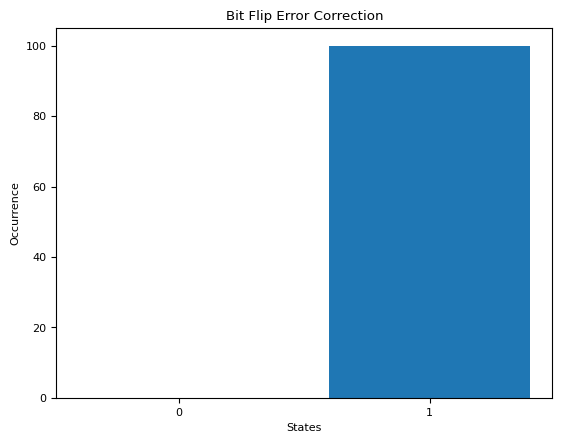

In [49]:
# Preparing Noises
noisy_channel_circuit = cirq.Circuit()
noisy_channel_circuit.append(cirq.Z(qubits[1]))
noisy_channel_circuit.append(cirq.Z(qubits[2]))

# Appending Rest of the circuit
phaseflip_circuit = encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit + decode_circuit

display(SVGCircuit(phaseflip_circuit))

# Print Final State Vector without measuring (decode_circuit)
print("\nFinal State (Without Measurement):")
print(cirq.dirac_notation(cirq.final_state_vector(encode_circuit + noisy_channel_circuit + detection_circuit +correction_circuit))) 

# Simulating
sim = cirq.Simulator()

result = sim.run(phaseflip_circuit, repetitions=100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title='Bit Flip Error Correction', xlabel='States', ylabel='Occurrence', tick_label=binary_labels(1))

plt.show()

## Conclusion

- In quantum error correction, the accuracy of error correction schemes can be significantly impacted by the number of qubits affected by errors. In our case, when the majority of qubits (2 out of 3) experience phase flip errors, the correction process may fail to restore the logical qubit to its correct state. This is because the error correction code relies on the majority to determine the presence of an error and apply the necessary corrections.

- When most of the qubits are erroneous, the correction mechanism can be overwhelmed, leading to incorrect results. This highlights the importance of having reliable error correction codes and the need for robust schemes capable of handling multiple errors to ensure the fidelity of quantum computations.

- Thus, while error correction codes can effectively handle single errors or a small number of errors, they may struggle when the majority of qubits are affected, underscoring the need for continued advancements in quantum error correction methods.
